# Author: VEDANT PANDEY

# The Sparks Foundation


# Data Science & Business Analytics

# Task 1: Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours.

For this task we will be using Simple Linear Regression. 
The steps followed are:
1) Importing the data

2) Exploring the data

3) Data Visualization

4) Splitting the data for model building

5) Model Building and Training

6) Making Predictions

7) Evaluating the model

8) Conclusion

# Importing Libraries and Loading the data

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Loading the data
url="http://bit.ly//w-data"
data=pd.read_csv(url)
#Checking initial rows and columns
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploring the data

In [11]:
#Shape 
data.shape

(25, 2)

In [12]:
#columns
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
#Describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
#Number of unique values in 'scores'column
data.Scores.nunique()

23

In [15]:
#Checking Null Values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Hours'>

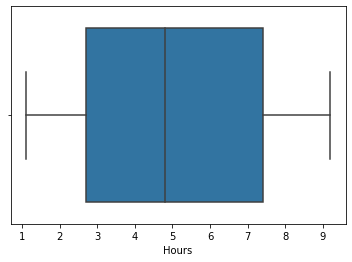

In [16]:
#checking outliers by plotting boxplot
sns.boxplot(x=data.Hours)

<AxesSubplot:xlabel='Scores'>

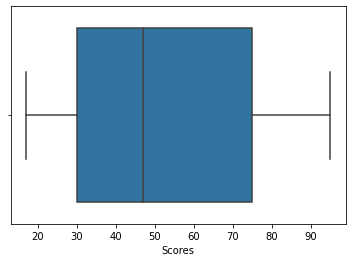

In [17]:
sns.boxplot(x=data.Scores)

In [18]:
#Hence,no major outliers are present

# Data Visualization

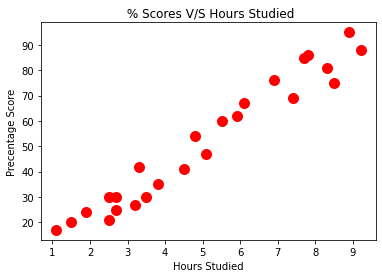

In [19]:
#Scatter Plot for 'Hours' and 'Scores'
plt.scatter(data['Hours'],data['Scores'],lw=5,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Precentage Score')
plt.title(' % Scores V/S Hours Studied')
plt.show()
# We can see there is linear sort of relation between both the variables.

<AxesSubplot:>

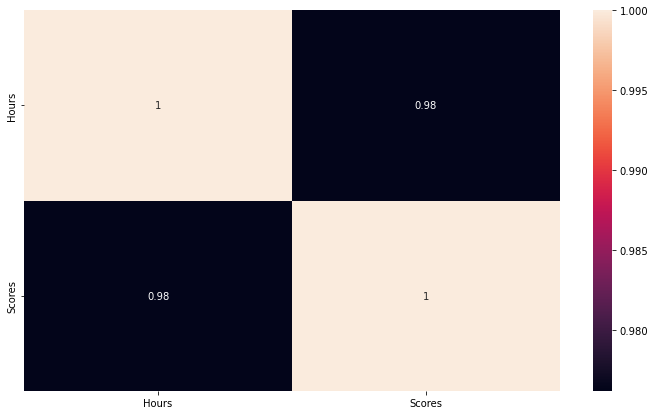

In [21]:
#Coorelation heatmap
correlation=data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True)

#It is clear that dependence of one variable on other is very high i.e. 0.98. 

# Splitting the data for Model Building

In [22]:
y=data.iloc[:,1].values
x=data.iloc[:,:-1].values

In [23]:
#Splitting the data into training and testing data using scikit learn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

# Model Building & Training

In [24]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
#Instantiate the model
lr=LinearRegression()

#fitting the model
lr.fit(x_train,y_train)

print("Training Complete.")

Training Complete.


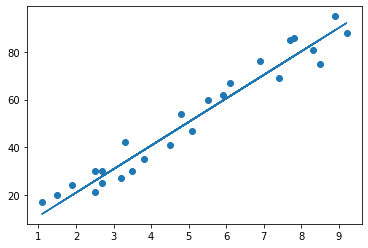

In [25]:
#Plotting the Regression Line
line=lr.coef_*x+lr.intercept_
#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

Now, we will use our Linear Regression model for predictions.

# Making Predictions

In [26]:
y_pred=lr.predict(x_test)

In [27]:
#Comparing actual and predicted values
df=pd.DataFrame({'Actual':y_test,'Predicted':y_test})
df

,Actual,Predicted
0,20,20
1,27,27
2,69,69
3,30,30
4,62,62
5,35,35
6,24,24
7,86,86
8,76,76
9,17,17


In [28]:
# Predicted score if a student studies for 9.25 hrs/ day?
hours=9.25
h=np.array(hours)
h=h.reshape(-1,1)
own_pred=lr.predict(h)
print("Number of hours=",hours)
print("Predicted Score = {}".format(own_pred[0]))

Number of hours= 9.25
Predicted Score = 92.65537184734602


In [29]:
test_score=lr.score(x_test,y_test)
train_score=lr.score(x_train,y_train)
print("Train Score:",train_score*100)
print("Test Score:",test_score*100)

Train Score: 94.40108159733136
Test Score: 95.66408472325591


# Evaluating the model

In [30]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.894510863410609


In [31]:
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:",np.sqrt((mean_squared_error(y_test,y_pred))))

Root Mean Squared Error: 5.102408224327238


# Conclusion

In this task we successfully created and implemented a Linear Regression Model with an MSE of 4.89 and RMSE of 5.10. The predicted percentage score of a student who studies 9.25 hours is 92.65.